In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from datetime import datetime
data = pd.read_csv("new_fedx.csv")
data.set_index('date')

,temperature,Rhumidity,Pressure
date,,,
2021-10-21T06:45:17+02:00,24.32,68.25,18.12
2021-10-21T06:45:38+02:00,24.01,69.00,17.98
2021-10-21T06:46:00+02:00,24.21,65.44,17.35
2021-10-21T06:46:21+02:00,23.84,68.19,17.63
2021-10-21T06:46:42+02:00,22.73,75.06,18.10
...,...,...,...
2022-12-21T12:06:44+01:00,31.12,68.25,24.60
2022-12-21T12:07:58+01:00,30.92,68.69,24.52
2022-12-21T12:09:11+01:00,30.12,73.12,24.80


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2059 non-null   float64
 1   Rhumidity    2059 non-null   float64
 2   Pressure     2059 non-null   float64
 3   date         2059 non-null   object 
dtypes: float64(3), object(1)
memory usage: 64.5+ KB


In [34]:
data.describe()

,temperature,Rhumidity,Pressure
count,2059.000000,2059.000000,2059.000000
mean,26.469573,81.828713,22.838650
std,2.677332,14.336676,2.478783
min,16.920000,37.810000,12.850000
25%,24.660000,71.410000,21.875000
50%,25.920000,85.620000,23.870000
75%,28.555000,94.750000,24.490000
max,33.300000,100.000000,25.830000


In [35]:
from datetime import datetime

data['date'] = pd.to_datetime(data['date'])

In [36]:
data.set_index('date', inplace = True)

In [37]:
data

,temperature,Rhumidity,Pressure
date,,,
2021-10-21 06:45:17+02:00,24.32,68.25,18.12
2021-10-21 06:45:38+02:00,24.01,69.00,17.98
2021-10-21 06:46:00+02:00,24.21,65.44,17.35
2021-10-21 06:46:21+02:00,23.84,68.19,17.63
2021-10-21 06:46:42+02:00,22.73,75.06,18.10
...,...,...,...
2022-12-21 12:06:44+01:00,31.12,68.25,24.60
2022-12-21 12:07:58+01:00,30.92,68.69,24.52
2022-12-21 12:09:11+01:00,30.12,73.12,24.80


In [38]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, column, timestamp, title):
    '''
    df: dataframe, the dataset.
    column: str, name of column you want to plot
    title: str, title of the plot
    timestamp: str, column of the time for the time series data
    '''
    fig = px.line(title=title)
    for i in df[[column]]:
        fig.add_scatter(x=timestamp, y=df[i], name=i)
    fig.show()
              
interactive_plot(data, 'Pressure', data.index, 'Pressure') 

In [39]:
interactive_plot(data, 'temperature', data.index, 'temperature') 

In [40]:
interactive_plot(data, 'Rhumidity', data.index, 'Rhumidity') 

   # EDA

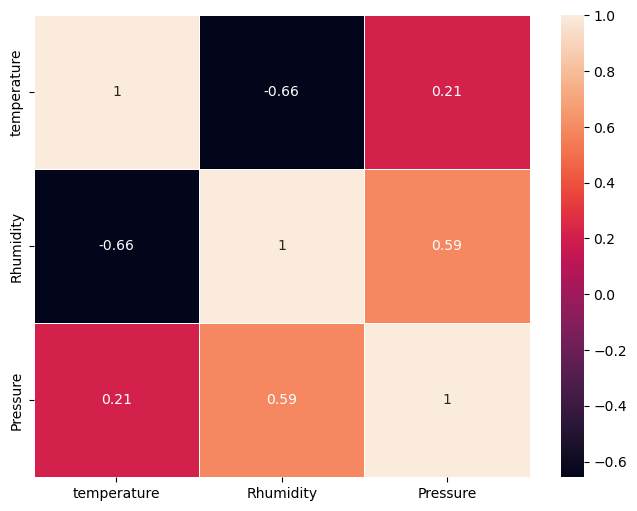

In [41]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(8,6))  # Sample figsize in inches
sns.heatmap(data.corr(method='pearson'), annot=True, linewidths=.5, ax=ax);

    from the above:
        presure_hpa and temperaure_c has a strong correlation with dewpoint_c by 91% and 82% respectively

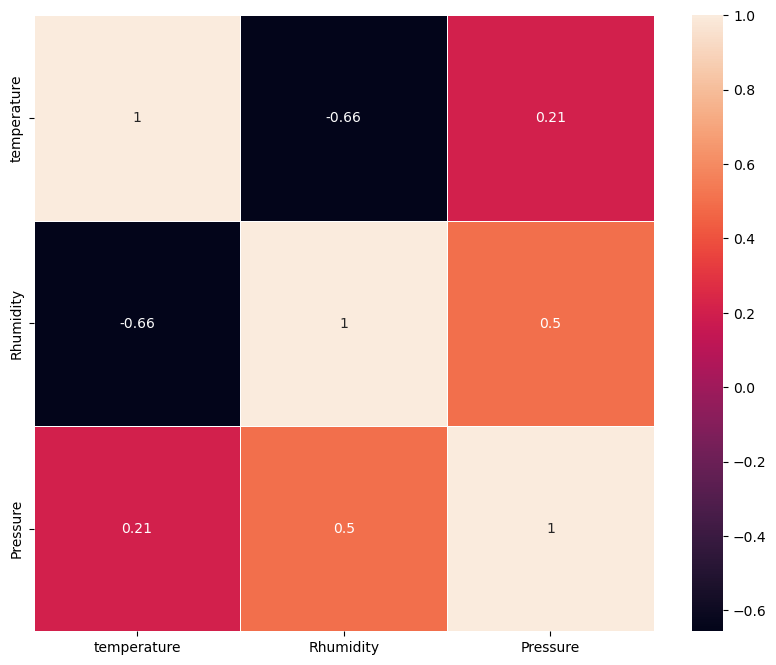

In [42]:
# spearman's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(10,8))  # Sample figsize in inches
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=.5, ax=ax);

    from the above:
        presure_hpa and temperaure_c has a strong correlation with dewpoint_c by 88% and 78% respectively

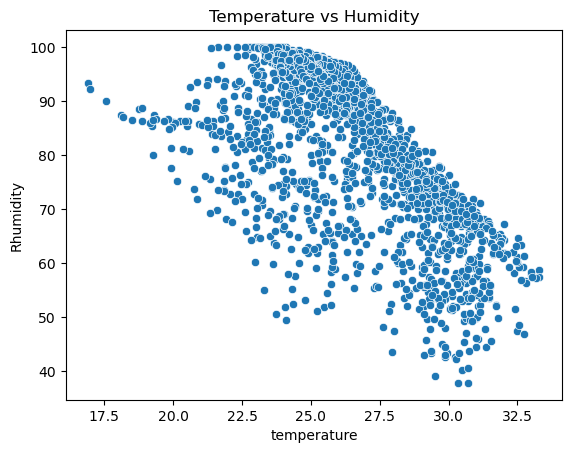

In [43]:
sns.scatterplot(x='temperature', y='Rhumidity', data=data)
plt.title('Temperature vs Humidity')
plt.show()


   # BUILDING MODEL TO PREDICT TEMPERATURE

standardizing the dataset

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Mean of each column", scaler.mean_)
print("Variance of each column", scaler.var_)
scaled_data

Mean of each column [26.46957261 81.82871297 22.83864983]
Variance of each column [  7.16462313 205.44046707   6.14138273]


array([[-0.80307377, -0.94736124, -1.9040777 ],
       [-0.91888883, -0.89503515, -1.96057075],
       [-0.84416944, -1.14340965, -2.21478943],
       ...,
       [ 1.36378855, -0.60759051,  0.7914474 ],
       [ 0.90800027, -0.10595774,  0.94882087],
       [ 0.27288545,  0.49195502,  0.96496174]])

-----------------------------------

    Remember, you can't use shuffle the data when splitting it to the train and test set because it is a time series data.
    
-------------------------------------

In [45]:
# Create Matrix of Features and target variable without scaling**
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')
print("--------------------------------------------------")
print("Shape of the Matrix of features", X.shape, sep='\n')
print("Shape of the target variable", y.shape, sep='\n')

Matrix of features
[[-0.80307377 -0.94736124]
 [-0.91888883 -0.89503515]
 [-0.84416944 -1.14340965]
 ...
 [ 1.36378855 -0.60759051]
 [ 0.90800027 -0.10595774]
 [ 0.27288545  0.49195502]]
--------------------------------------------------
Target Variable
[-1.9040777  -1.96057075 -2.21478943 ...  0.7914474   0.94882087
  0.96496174]
--------------------------------------------------
Shape of the Matrix of features
(2059, 2)
Shape of the target variable
(2059,)


In [46]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,
                                                  shuffle=False)

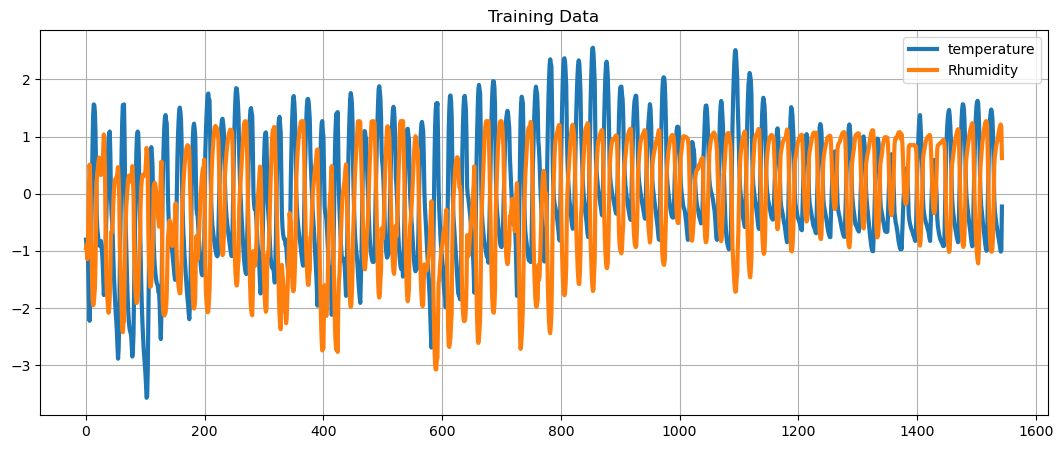

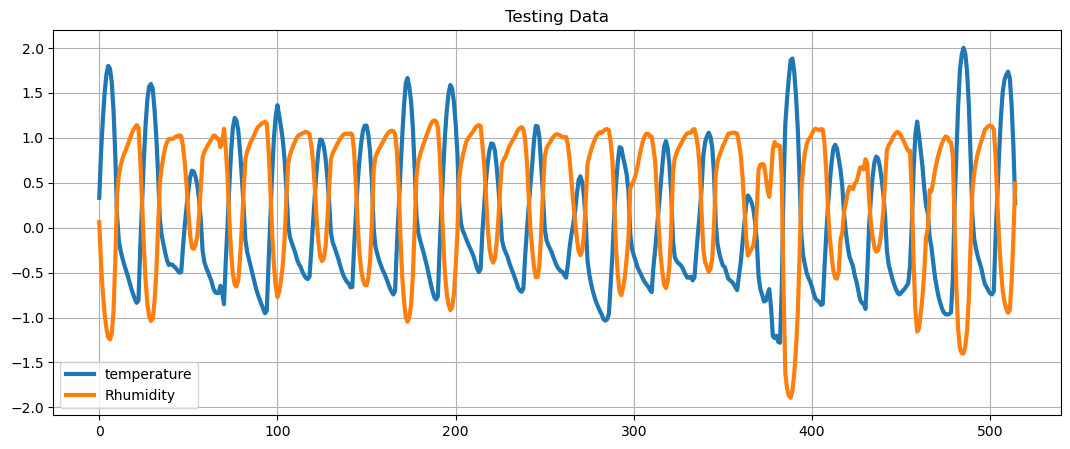

In [47]:
# Define a data plotting function
def show_plot(data, title):
    plt.figure(figsize=(13, 5))
    plt.plot(data, linewidth=3)
    plt.title(title)
    plt.legend(['temperature', 'Rhumidity'])
    plt.grid()

show_plot(X_train, "Training Data")
show_plot(X_val, "Testing Data")

# RIDGE REGRESSION

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# fit model to training data
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_1 = ridge_model.predict(X_val)
print("R Squared on Validation Set: ", ridge_model.score(X_val, y_val))
print("RMSE of Ridge Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_1)))

R Squared on Validation Set:  0.8651915632163266
RMSE of Ridge Regressor:  0.10616297719695819


In [49]:
from math import sqrt

# Make Predictions on the entire dataset
y_pred = ridge_model.predict(X)
print("Model Prediction on entire dataset", y_pred)


# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, -1]
print("Original y", original_y)

# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[-1])) + scaler.mean_[-1]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
# df_prediction.to_csv('ridge_pressure.csv', index = True)
print(df_prediction.head(15))

# Function to plot interactive plots using Plotly Express
def interactive_plot2(data, title):
    fig = px.line(title=title)
    for i in data.columns:
        fig.add_scatter(x=data.index, y=data[i], name=i)
        fig.show()

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions (Ridge)")

Model Prediction on entire dataset [-2.06166254 -2.11505705 -2.35741142 ...  0.63823253  0.80948639
  0.91774527]
Original y [18.12 17.98 17.35 ... 24.8  25.19 25.23]
Unstandardized y_pred [17.7294762  17.59715493 16.99655685 ... 24.42030577 24.8447039
 25.11298902]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   18.12   17.729476
2021-10-21 06:45:38+02:00   17.98   17.597155
2021-10-21 06:46:00+02:00   17.35   16.996557
2021-10-21 06:46:21+02:00   17.63   17.252248
2021-10-21 06:46:42+02:00   18.10   17.711586
2021-10-21 06:47:03+02:00   18.60   18.412497
2021-10-21 06:47:24+02:00   18.66   18.711284
2021-10-21 06:47:46+02:00   19.05   18.979653
2021-10-21 06:48:07+02:00   18.97   18.650406
2021-10-21 06:48:28+02:00   18.93   18.556811
2021-10-21 06:49:51+02:00   18.90   18.707023
2021-10-21 06:50:12+02:00   19.02   19.217751
2021-10-21 06:51:17+02:00   19.76   20.149176
2021-10-21 06:52:13+02:00   20.38   20.7379

# Lassor Regressor

In [50]:
from sklearn.linear_model import Lasso

# fit model to training data
lasso_model = Lasso(alpha=0.0005)
lasso_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_2 = lasso_model.predict(X_val)
print("R Squared Lasso Regressor: ", lasso_model.score(X_val, y_val))
print("RMSE of Lasso Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_2)))

R Squared Lasso Regressor:  0.8650718627694145
RMSE of Lasso Regressor:  0.10621009938185845


In [51]:
# Make Predictions on the entire dataset
y_pred = lasso_model.predict(X)
print("Model Prediction on entire dataset", y_pred)

# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, -1]
print("Original y", original_y)
# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[-1])) + scaler.mean_[-1]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
# df_prediction.to_csv('lasso_pressure.csv', index = True)
print(df_prediction.head(15))

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions (Lasso)")

Model Prediction on entire dataset [-2.06113325 -2.11450274 -2.35680771 ...  0.63789105  0.80915308
  0.9174542 ]
Original y [18.12 17.98 17.35 ... 24.8  25.19 25.23]
Unstandardized y_pred [17.73078789 17.59852862 16.99805294 ... 24.41945952 24.84387789
 25.1122677 ]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   18.12   17.730788
2021-10-21 06:45:38+02:00   17.98   17.598529
2021-10-21 06:46:00+02:00   17.35   16.998053
2021-10-21 06:46:21+02:00   17.63   17.253720
2021-10-21 06:46:42+02:00   18.10   17.713059
2021-10-21 06:47:03+02:00   18.60   18.413934
2021-10-21 06:47:24+02:00   18.66   18.712739
2021-10-21 06:47:46+02:00   19.05   18.980952
2021-10-21 06:48:07+02:00   18.97   18.651645
2021-10-21 06:48:28+02:00   18.93   18.557874
2021-10-21 06:49:51+02:00   18.90   18.707862
2021-10-21 06:50:12+02:00   19.02   19.218265
2021-10-21 06:51:17+02:00   19.76   20.149339
2021-10-21 06:52:13+02:00   20.38   20.737

# DECISION TREE

In [52]:
from sklearn.tree import DecisionTreeRegressor

# fit model to training data
dt_model = DecisionTreeRegressor(max_leaf_nodes=50,
                                 random_state=1)
dt_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_4 = dt_model.predict(X_val)
print("R Squared Decision Tree Regressor: ", dt_model.score(X_val, y_val))
print("RMSE of Decision Tree Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_4)))

R Squared Decision Tree Regressor:  0.6764127876892352
RMSE of Decision Tree Regressor:  0.1644789133745065


In [53]:
# Make Predictions on the entire dataset
y_pred = dt_model.predict(X)
print("Model Prediction on entire dataset", y_pred)

# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, -1]
print("Original y", original_y)
# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[-1])) + scaler.mean_[-1]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
# df_prediction.to_csv('dt_pressure.csv', index = True)
print(df_prediction.head(15))

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions (Decision Tree)")

Model Prediction on entire dataset [-1.79371451 -1.79371451 -2.69094506 ...  0.50091176  0.75938183
  0.90160359]
Original y [18.12 17.98 17.35 ... 24.8  25.19 25.23]
Unstandardized y_pred [18.3935     18.3935     16.17       ... 24.08       24.72053571
 25.07298701]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   18.12   18.393500
2021-10-21 06:45:38+02:00   17.98   18.393500
2021-10-21 06:46:00+02:00   17.35   16.170000
2021-10-21 06:46:21+02:00   17.63   18.393500
2021-10-21 06:46:42+02:00   18.10   18.113333
2021-10-21 06:47:03+02:00   18.60   18.490000
2021-10-21 06:47:24+02:00   18.66   18.490000
2021-10-21 06:47:46+02:00   19.05   18.490000
2021-10-21 06:48:07+02:00   18.97   19.368636
2021-10-21 06:48:28+02:00   18.93   19.625357
2021-10-21 06:49:51+02:00   18.90   19.075385
2021-10-21 06:50:12+02:00   19.02   18.920938
2021-10-21 06:51:17+02:00   19.76   20.449630
2021-10-21 06:52:13+02:00   20.38   20.449

# Xgboost Regressor

In [54]:
from xgboost import XGBRegressor

# check for the best number of n_estimators
xgboost_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=-1)
xgboost_model.fit(X_train, y_train,
                  early_stopping_rounds=20,
                  eval_set=[(X_val, y_val)],
                  verbose=True)

[0]	validation_0-rmse:0.26805
[1]	validation_0-rmse:0.24627
[2]	validation_0-rmse:0.22741
[3]	validation_0-rmse:0.20974
[4]	validation_0-rmse:0.19598
[5]	validation_0-rmse:0.18482
[6]	validation_0-rmse:0.17493
[7]	validation_0-rmse:0.16268
[8]	validation_0-rmse:0.15303
[9]	validation_0-rmse:0.14391
[10]	validation_0-rmse:0.13593
[11]	validation_0-rmse:0.12821
[12]	validation_0-rmse:0.12123
[13]	validation_0-rmse:0.11496


/home/c4leb/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-rmse:0.10942
[15]	validation_0-rmse:0.10447
[16]	validation_0-rmse:0.09987
[17]	validation_0-rmse:0.09474
[18]	validation_0-rmse:0.09112
[19]	validation_0-rmse:0.08767
[20]	validation_0-rmse:0.08370
[21]	validation_0-rmse:0.08157
[22]	validation_0-rmse:0.07941
[23]	validation_0-rmse:0.07653
[24]	validation_0-rmse:0.07377
[25]	validation_0-rmse:0.07188
[26]	validation_0-rmse:0.06967
[27]	validation_0-rmse:0.06786
[28]	validation_0-rmse:0.06552
[29]	validation_0-rmse:0.06392
[30]	validation_0-rmse:0.06265
[31]	validation_0-rmse:0.06075
[32]	validation_0-rmse:0.05906
[33]	validation_0-rmse:0.05803
[34]	validation_0-rmse:0.05677
[35]	validation_0-rmse:0.05553
[36]	validation_0-rmse:0.05442
[37]	validation_0-rmse:0.05287
[38]	validation_0-rmse:0.05209
[39]	validation_0-rmse:0.05143
[40]	validation_0-rmse:0.05028
[41]	validation_0-rmse:0.04947
[42]	validation_0-rmse:0.04876
[43]	validation_0-rmse:0.04818
[44]	validation_0-rmse:0.04750
[45]	validation_0-rmse:0.04725
[46]	val

[273]	validation_0-rmse:0.02993
[274]	validation_0-rmse:0.02990
[275]	validation_0-rmse:0.02988
[276]	validation_0-rmse:0.02983
[277]	validation_0-rmse:0.02981
[278]	validation_0-rmse:0.02980
[279]	validation_0-rmse:0.02978
[280]	validation_0-rmse:0.02971
[281]	validation_0-rmse:0.02967
[282]	validation_0-rmse:0.02960
[283]	validation_0-rmse:0.02957
[284]	validation_0-rmse:0.02955
[285]	validation_0-rmse:0.02952
[286]	validation_0-rmse:0.02952
[287]	validation_0-rmse:0.02952
[288]	validation_0-rmse:0.02952
[289]	validation_0-rmse:0.02952
[290]	validation_0-rmse:0.02951
[291]	validation_0-rmse:0.02939
[292]	validation_0-rmse:0.02934
[293]	validation_0-rmse:0.02929
[294]	validation_0-rmse:0.02928
[295]	validation_0-rmse:0.02928
[296]	validation_0-rmse:0.02925
[297]	validation_0-rmse:0.02924
[298]	validation_0-rmse:0.02920
[299]	validation_0-rmse:0.02919
[300]	validation_0-rmse:0.02917
[301]	validation_0-rmse:0.02916
[302]	validation_0-rmse:0.02911
[303]	validation_0-rmse:0.02906
[304]	va

[530]	validation_0-rmse:0.02731
[531]	validation_0-rmse:0.02731
[532]	validation_0-rmse:0.02731
[533]	validation_0-rmse:0.02731
[534]	validation_0-rmse:0.02730
[535]	validation_0-rmse:0.02730
[536]	validation_0-rmse:0.02730
[537]	validation_0-rmse:0.02730
[538]	validation_0-rmse:0.02730
[539]	validation_0-rmse:0.02730
[540]	validation_0-rmse:0.02730
[541]	validation_0-rmse:0.02730
[542]	validation_0-rmse:0.02729
[543]	validation_0-rmse:0.02728
[544]	validation_0-rmse:0.02728
[545]	validation_0-rmse:0.02726
[546]	validation_0-rmse:0.02726
[547]	validation_0-rmse:0.02726
[548]	validation_0-rmse:0.02726
[549]	validation_0-rmse:0.02726
[550]	validation_0-rmse:0.02726
[551]	validation_0-rmse:0.02726
[552]	validation_0-rmse:0.02726
[553]	validation_0-rmse:0.02724
[554]	validation_0-rmse:0.02723
[555]	validation_0-rmse:0.02723
[556]	validation_0-rmse:0.02724
[557]	validation_0-rmse:0.02723
[558]	validation_0-rmse:0.02723
[559]	validation_0-rmse:0.02722
[560]	validation_0-rmse:0.02722
[561]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=500, learning_rate=0.1)
xgboost_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model.predict(X_val)
print("R Squared XGBoost Regressor: ", xgboost_model.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))
x = np.sqrt(mean_squared_error(y_val, y_pred_5))

R Squared XGBoost Regressor:  0.9909760385008832
RMSE of XGBoost Regressor:  0.027467122836088643


In [56]:
# Make Predictions on the entire dataset
y_pred = xgboost_model.predict(X)
print("Model Prediction on entire dataset", y_pred)

# Inverse transform y and y_pred
# get the inverse transform of y (the next temp value)
original_y = scaler.inverse_transform(scaled_data)[:, -1]
print("Original y", original_y)
# Manually calculate the Inverse transform the model prediction
unscaled_y_pred = (y_pred * sqrt(scaler.var_[-1])) + scaler.mean_[-1]
print("Unstandardized y_pred", unscaled_y_pred)

# Create a dataframe of the actual and predicted values for visualization
df_prediction = pd.DataFrame()
df_prediction["Actual"] = original_y
df_prediction["Prediction"] = unscaled_y_pred
df_prediction.set_index(data.index, inplace=True)
# df_prediction.to_csv('xgboost_pressure.csv', index = True)
print(df_prediction.head(15))

# Plot the results
interactive_plot2(df_prediction, "Original vs. Predictions (XGBoost)")

Model Prediction on entire dataset [-1.9207418  -1.9617971  -2.2197998  ...  0.737803    0.91169363
  0.9694307 ]
Original y [18.12 17.98 17.35 ... 24.8  25.19 25.23]
Unstandardized y_pred [18.078703 17.976961 17.337584 ... 24.667059 25.097992 25.241076]
                           Actual  Prediction
date                                         
2021-10-21 06:45:17+02:00   18.12   18.078703
2021-10-21 06:45:38+02:00   17.98   17.976961
2021-10-21 06:46:00+02:00   17.35   17.337584
2021-10-21 06:46:21+02:00   17.63   17.631725
2021-10-21 06:46:42+02:00   18.10   18.098316
2021-10-21 06:47:03+02:00   18.60   18.599909
2021-10-21 06:47:24+02:00   18.66   18.666721
2021-10-21 06:47:46+02:00   19.05   19.043093
2021-10-21 06:48:07+02:00   18.97   18.990997
2021-10-21 06:48:28+02:00   18.93   18.926968
2021-10-21 06:49:51+02:00   18.90   18.906628
2021-10-21 06:50:12+02:00   19.02   19.000893
2021-10-21 06:51:17+02:00   19.76   19.767855
2021-10-21 06:52:13+02:00   20.38   20.379230
2021-10-2

# Saving the base model 

In [57]:
# import joblib as jb
# jb.dump(xgboost_model, "xgboost_pressure.sav")

# xgboost model 2

In [58]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model_2 = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3)


xgboost_model_2.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model_2.predict(X_val)
print("R Squared XGBoost Regressor: ", xgboost_model_2.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))
y = np.sqrt(mean_squared_error(y_val, y_pred_5))

R Squared XGBoost Regressor:  0.9847161458037482
RMSE of XGBoost Regressor:  0.03574629177006556


# xgboost model 3

In [59]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model_3 = XGBRegressor(n_estimators=800, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)

xgboost_model_3.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model_3.predict(X_val)
print("R Squared XGBoost Regressor: ", xgboost_model_3.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))
z =  np.sqrt(mean_squared_error(y_val, y_pred_5))

R Squared XGBoost Regressor:  0.821085197895225
RMSE of XGBoost Regressor:  0.12230316305171134


In [60]:
print("R Squared XGBoost Regressor: ", xgboost_model.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))

print("R Squared XGBoost Regressor: ", xgboost_model_2.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))

print("R Squared XGBoost Regressor: ", xgboost_model_3.score(X_val, y_val))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_val, y_pred_5)))

R Squared XGBoost Regressor:  0.9909760385008832
RMSE of XGBoost Regressor:  0.12230316305171134
R Squared XGBoost Regressor:  0.9847161458037482
RMSE of XGBoost Regressor:  0.12230316305171134
R Squared XGBoost Regressor:  0.821085197895225
RMSE of XGBoost Regressor:  0.12230316305171134


In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scores(models, r_squared, rmse):
    # Set up the bar plot
    fig, ax = plt.subplots(figsize=(8, 6))
    index = np.arange(len(models))
    bar_width = 0.35

    # Plot the R-squared values
    rects1 = ax.bar(index, r_squared, bar_width, label='R-squared')

    # Plot the RMSE values
    rects2 = ax.bar(index + bar_width, rmse, bar_width, label='RMSE')

    # Set the x-axis labels
    ax.set_xlabel('Models')
    ax.set_ylabel('Score')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.set_title('Pressure')
    ax.legend()

    # Add labels to each bar
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    # Display the plot
    plt.tight_layout()
    plt.show()


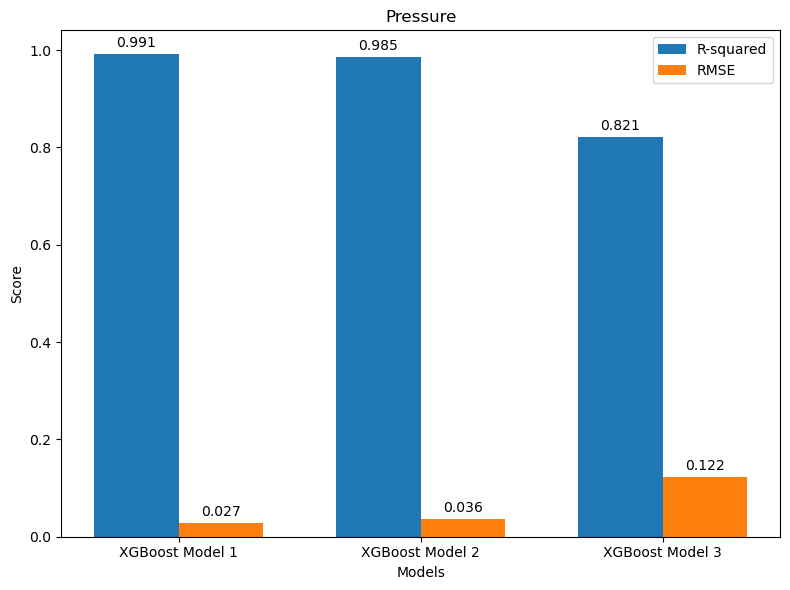

In [64]:
models = ['XGBoost Model 1', 'XGBoost Model 2', 'XGBoost Model 3']
r_squared = [xgboost_model.score(X_val, y_val), xgboost_model_2.score(X_val, y_val), xgboost_model_3.score(X_val, y_val)]
rmse = [x, y, z]
plot_scores(models, r_squared, rmse)
